# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install labelme tensorflow-macos tensorflow-metal opencv-python matplotlib albumentations

     |████████████████████████████████| 1.4 MB 715 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 4.7 MB/s eta 0:00:01
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
     |████████████████████████████████| 7.8 MB 959 kB/s eta 0:00:01
     |████████████████████████████████| 274 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 292 kB/s eta 0:00:011
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
     |████████████████████████████████| 16.8 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 5.4 MB/s eta 0:00:01
  Using cached PyYAML-6.0.2-cp39-cp39-macosx_11_0_arm64.whl (172 kB)
     |████████████████████████████████| 95 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 2.5 MB/s eta 0:00:01
     |███████████████████████████

### 1.2 Collect Images Using OpenCV

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [10]:
!labelme

2025-01-06 14:33:02.555 | INFO     | labelme.config:get_config:66 - Loading config file from: /Users/ankit/.labelmerc
2025-01-06 14:33:09.245 Python[13942:1209547] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-06 14:33:09.245 Python[13942:1209547] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-01-06 14:33:15.026 Python[13942:1209547] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'
2025-01-06 14:36:10.053 Python[13942:1209547] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2.3 Load Image into TF Data Pipeline

In [6]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

2025-01-17 22:43:44.364638: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-17 22:43:44.364704: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-17 22:43:44.364715: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-17 22:43:44.364969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-17 22:43:44.365002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/images/*.jpg'

In [6]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [6]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [19]:
images = images.map(load_image)

In [47]:
images.as_numpy_iterator().next()

2025-01-07 21:44:57.944802: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/53304ef6-cc0b-11ef-91c1-6a98c37699bd.jpg; No such file or directory
2025-01-07 21:44:57.944818: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/6a6c0eb2-cc0a-11ef-91c1-6a98c37699bd.jpg; No such file or directory
2025-01-07 21:44:57.944825: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/73455282-cc0a-11ef-91c1-6a98c37699bd.jpg; No such file or directory
2025-01-07 21:44:57.944840: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/6e8a0152-cc0a-11ef-91c1-6a98c37699bd.jpg; No such file or directory
2025-01-07 21:44:57.944848: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FO

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} data/images/53304ef6-cc0b-11ef-91c1-6a98c37699bd.jpg; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext] name: 

In [21]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [22]:
image_generator = images.batch(4).as_numpy_iterator()

In [25]:
plot_images = image_generator.next()

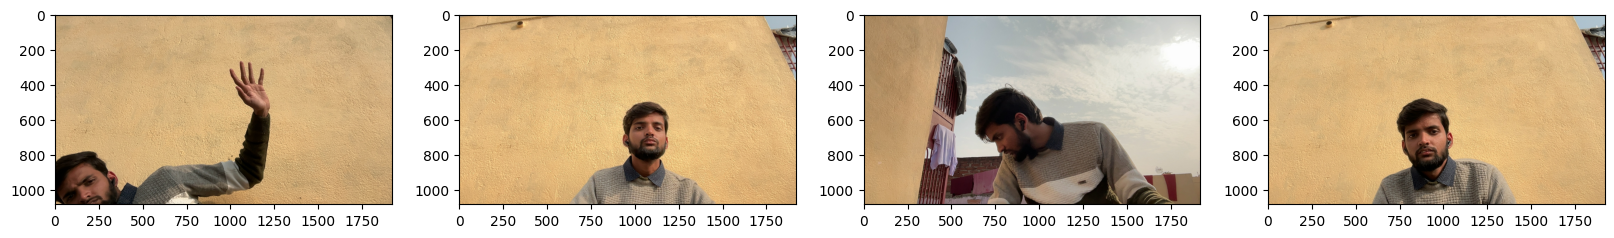

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [27]:
90*.7 # 63 to train

62.99999999999999

In [28]:
90*.15 # 14 and 13 to test and val

13.5

### 3.2 Move the Matching Labels

In [7]:
import os

In [21]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [8]:
import albumentations as alb

/Users/ankit/DeepLearning/FaceDetection/facedetection/lib/python3.9/site-packages/albumentations/check_version.py:51: UserWarning: Error fetching version info <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>
  data = fetch_version_info()


In [9]:
augmentor = alb.Compose([alb.RandomCrop(width=1080, height=1080), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

/Users/ankit/DeepLearning/FaceDetection/facedetection/lib/python3.9/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [10]:
img = cv2.imread(os.path.join('data','train', 'images','51d5b1f4-cc0b-11ef-91c1-6a98c37699bd.jpg'))

In [11]:
with open(os.path.join('data', 'train', 'labels', '51d5b1f4-cc0b-11ef-91c1-6a98c37699bd.json'), 'r') as f:
    label = json.load(f)

In [12]:
label['shapes'][0]['points']

[[852.8571428571428, 505.8730158730158],
 [1132.2222222222222, 872.5396825396825]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [13]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [14]:
coords

[852.8571428571428, 505.8730158730158, 1132.2222222222222, 872.5396825396825]

In [15]:
coords = list(np.divide(coords, [1920,1080,1920,1080]))

In [16]:
coords

[0.44419642857142855,
 0.4684009406231628,
 0.5896990740740741,
 0.807907113462669]

### 4.4 Apply Augmentations and View Results

In [17]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [18]:
augmented['bboxes'][0][2:]

[0.467724860156024, 0.8079071044921875]

In [19]:
augmented['bboxes']

[[0.20905347047028722,
  0.4684009552001953,
  0.467724860156024,
  0.8079071044921875]]

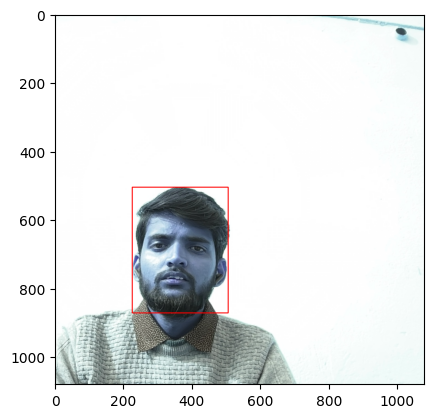

In [20]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [1080,1080]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [1080,1080]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [20]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img_path = os.path.join('data', partition, 'images', image)
        img = cv2.imread(img_path)

        # Validate image loading
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Ensure image is 3-channel
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        coords = [0, 0, 0.00001, 0.00001]  # Default bbox
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]

            # Normalize coordinates
            coords = list(np.divide(coords, [1920, 1080, 1920, 1080]))
            coords = list(np.clip(coords, 0, 1))  # Ensure bbox values are valid

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                # Save augmented image
                aug_img_path = os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg')
                cv2.imwrite(aug_img_path, augmented['image'])

                # Create annotation
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                # Save annotation
                aug_label_path = os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json')
                with open(aug_label_path, 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


/Users/ankit/DeepLearning/FaceDetection/facedetection/lib/python3.9/site-packages/albumentations/core/bbox_utils.py:488: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)


Failed to load image: data/train/images/.DS_Store
Failed to load image: data/train/images/.ipynb_checkpoints
Failed to load image: data/test/images/.DS_Store


### 5.2 Load Augmented Images to Tensorflow Dataset

In [21]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

2025-01-23 00:17:18.587982: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-23 00:17:18.588053: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-23 00:17:18.588064: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-23 00:17:18.588624: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-23 00:17:18.588662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [23]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [24]:
train_images.as_numpy_iterator().next()

array([[[0.9098039 , 0.9372549 , 0.9098039 ],
        [0.92941177, 0.9529412 , 0.9137255 ],
        [0.9490196 , 0.9607843 , 0.9254902 ],
        ...,
        [0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216]],

       [[0.9647059 , 0.9647059 , 0.9254902 ],
        [0.9647059 , 0.972549  , 0.92941177],
        [0.972549  , 0.98039216, 0.9372549 ],
        ...,
        [0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216],
        [0.99215686, 0.99607843, 0.9764706 ]],

       [[0.9647059 , 0.972549  , 0.92941177],
        [0.96862745, 0.9764706 , 0.93333334],
        [0.972549  , 0.98039216, 0.9372549 ],
        ...,
        [0.99215686, 0.99215686, 0.9843137 ],
        [0.99607843, 0.99607843, 0.9882353 ],
        [1.        , 1.        , 0.99215686]],

       ...,

       [[0.9764706 , 0.9764706 , 0.92941177],
        [0.9764706 , 0.9764706 , 0.92941177],
        [0.972549  , 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [25]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [26]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [27]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [28]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.7324, 0.4685, 0.9907, 0.808 ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [30]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

### 7.2 Create Final Datasets (Images/Labels)

In [31]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [32]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [33]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [34]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0735  , 0.002499, 0.7715  , 0.9917  ],
        [0.0495  , 0.2479  , 0.2935  , 0.5317  ],
        [0.8604  , 0.3154  , 1.      , 0.6597  ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.531   , 0.621   , 0.7656  , 0.864   ],
        [0.2764  , 0.4685  , 0.5205  , 0.752   ],
        [0.4014  , 0.5376  , 0.6646  , 0.8403  ]], dtype=float16))

### 7.3 View Images and Annotations

In [35]:
data_samples = train.as_numpy_iterator()

In [36]:
res = data_samples.next()

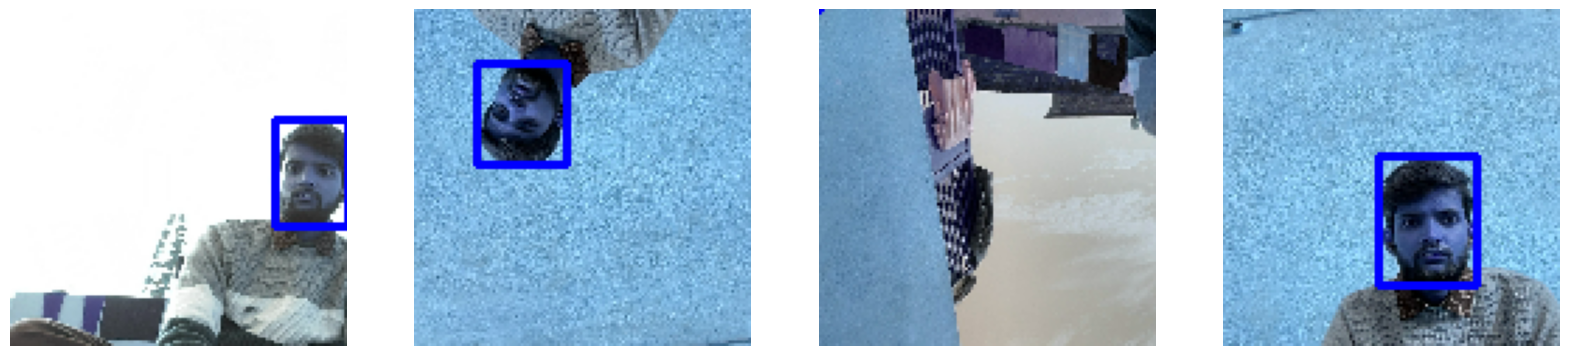

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    # Retrieve the sample image and bounding box coordinates
    sample_image = res[0][idx]  # Image tensor (already a NumPy array)
    sample_coords = res[1][1][idx]  # Normalized bounding box coordinates (0-1)

    # Scale image to original pixel values (0-255) if normalized
    sample_image = (sample_image * 255).astype(np.uint8)
    sample_image = sample_image.copy()  # Ensure the array is writable

    # Draw bounding box on the image
    start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))
    cv2.rectangle(sample_image, start_point, end_point, (255, 0, 0), 2)

    # Convert BGR (OpenCV) to RGB for Matplotlib display
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

    # Display image with bounding box
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')

plt.show()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [39]:
vgg = VGG16(include_top=False, weights = 'models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [40]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [41]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False, weights = 'models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [42]:
facetracker = build_model()

In [43]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
X, y = train.as_numpy_iterator().next()

In [45]:
X.shape

(8, 120, 120, 3)

In [46]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


2025-01-23 00:18:26.873106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [47]:
classes, coords

(array([[0.61010003],
        [0.5110107 ],
        [0.5654718 ],
        [0.7100012 ],
        [0.5239371 ],
        [0.8098335 ],
        [0.6067322 ],
        [0.5044446 ]], dtype=float32),
 array([[0.52309597, 0.5061414 , 0.6674943 , 0.37578192],
        [0.60369205, 0.6415685 , 0.6322708 , 0.57700497],
        [0.5497758 , 0.49640575, 0.64769304, 0.3341935 ],
        [0.62379974, 0.74552006, 0.511534  , 0.45885393],
        [0.75015247, 0.50074726, 0.65123534, 0.4578068 ],
        [0.7058413 , 0.4580498 , 0.5720606 , 0.39368898],
        [0.613427  , 0.5480741 , 0.64139605, 0.3612782 ],
        [0.69307554, 0.6193289 , 0.58759856, 0.30131638]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [48]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

/Users/ankit/DeepLearning/FaceDetection/facedetection/lib/python3.9/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 9.2 Create Localization Loss and Classification Loss

In [50]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [51]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [52]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.800159>

In [53]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8079593>

In [54]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.800159>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [84]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [85]:
model = FaceTracker(facetracker)

In [86]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [87]:
logdir='logs'

In [88]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [89]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
Input X shape: (None, 120, 120, None), dtype: <dtype: 'float32'>
y[0] (classes) shape: <unknown>, dtype: <dtype: 'uint8'>
y[1] (coords) shape: <unknown>, dtype: <dtype: 'float16'>
Model output classes shape: (None, 1), dtype: <dtype: 'float32'>
Model output coords shape: (None, 4), dtype: <dtype: 'float32'>


ValueError: Cannot take the length of shape with unknown rank.

### 10.3 Plot Performance

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()